In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. As we can see column TotalCharges is of object type because of blank values of some resently joined costumers.
2. So firstly we replace blank values with "0" and convert datatype of TotalCharges from object to float.

In [5]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0").astype(float)

Check null values in data.

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df["customerID"].duplicated().sum()

0

SeniorCitizen column is of int type 0 for no and 1 for yes.
so convert it to yes and no for better understanding.

In [11]:
df["SeniorCitizen"]=df["SeniorCitizen"].replace(0,"No")
df["SeniorCitizen"]=df["SeniorCitizen"].replace(1,"Yes")

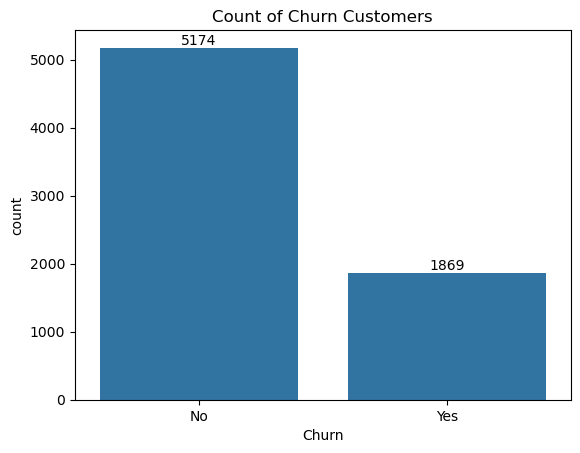

In [12]:
plot=sns.countplot(x="Churn",data=df)
plot.bar_label(plot.containers[0])
plt.title("Count of Churn Customers")
plt.show()

There are 1869 customers left or churn.

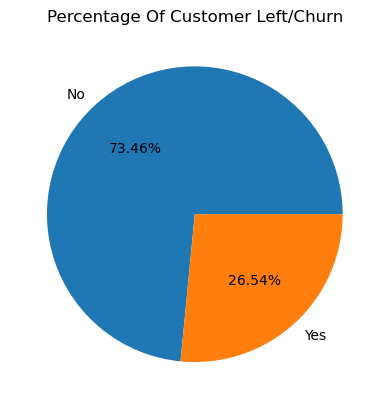

In [72]:
gp=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gp["Churn"],labels=gp.index,autopct="%1.2f%%")
plt.title("Percentage Of Customer Left/Churn")
plt.show()

26.54% of our customer churned out.

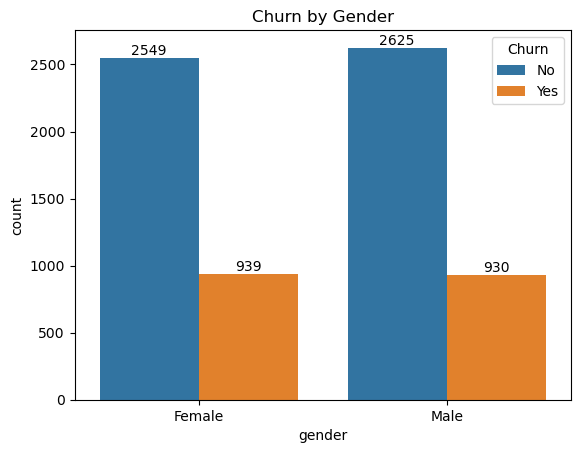

In [16]:
plot=sns.countplot(x="gender",data=df,hue="Churn")
for container in plot.containers:
    plot.bar_label(container)
plt.title("Churn by Gender")
plt.show()

From the above plot we can easily conclude that there is no relationship between gender and churned customer 
as both male and female has relatively same number of customer left.

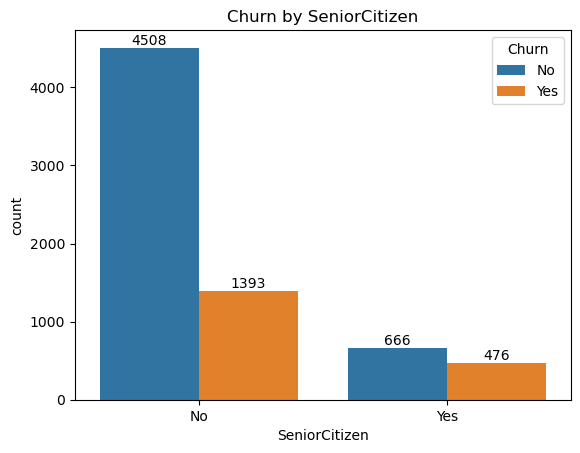

In [18]:
plot=sns.countplot(x="SeniorCitizen",data=df,hue="Churn")
for container in plot.containers:
    plot.bar_label(container)
plt.title("Churn by SeniorCitizen")
plt.show()

From the above plot we can clearly see that most of the Senior Citizens had Churned.

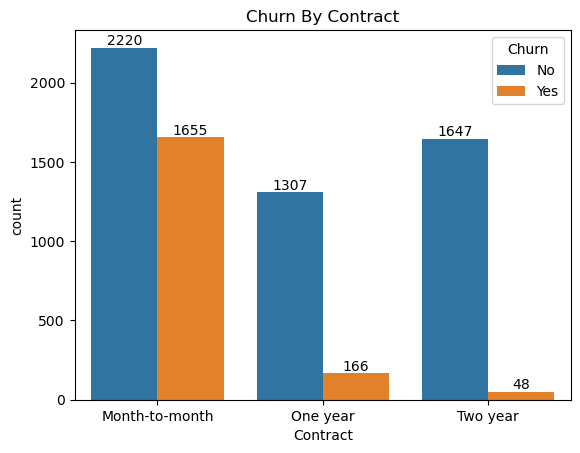

In [20]:
plot=sns.countplot(x="Contract",data=df,hue="Churn")
for container in plot.containers:
    plot.bar_label(container)
plt.title("Churn By Contract")
plt.show()

From the above chart it can easily be seen that most of the people churned are comes under month to month Contract.

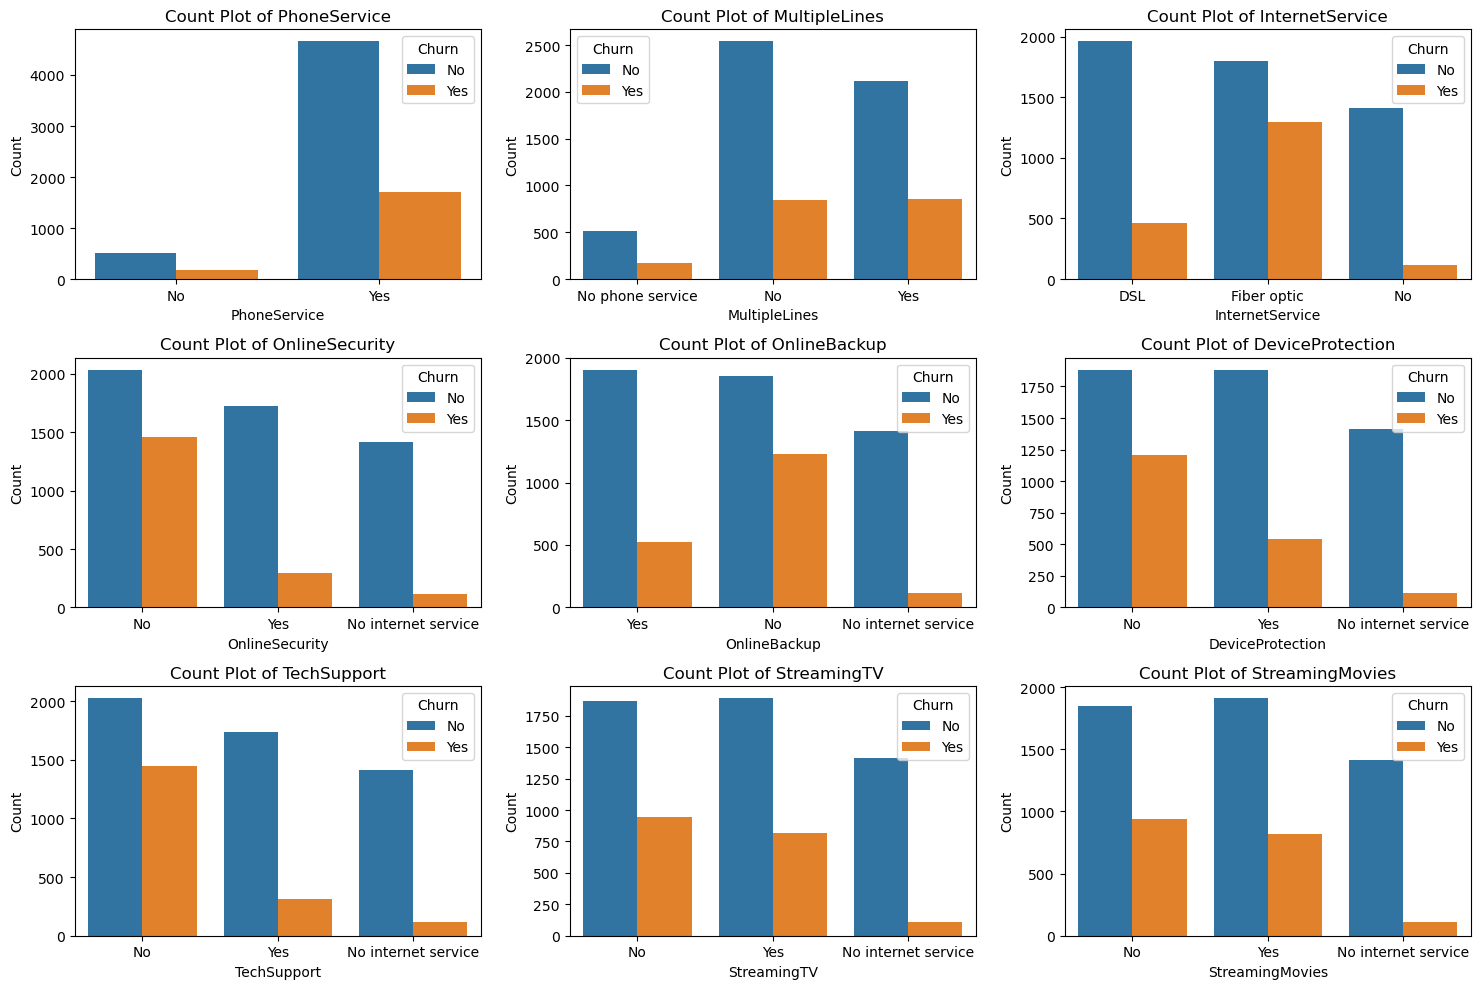

In [22]:
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
n_cols = 3
n_rows = 3  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(columns_to_plot):
    sns.countplot(data=df, x=col, ax=axes[i],hue="Churn")
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()

Here's a breakdown of the key observations:

1. Phone Service:

A majority of customers have phone service, regardless of whether they churn or not.
There's a slightly higher churn rate among customers without phone service.
2. Multiple Lines:

Most customers have only one phone line.
Churn rates are similar across customers with one or multiple lines.
3. Internet Service:

DSL and Fiber Optic are the most common internet services.
Churn rates are higher for customers with Fiber Optic service compared to DSL.
4. Online Security:

Most customers do not have online security.
Churn rates are significantly higher among customers who do not have online security.
5. Online Backup:

Similar to online security, most customers do not have online backup.
Churn rates are higher among customers without online backup.
6. Device Protection:

Most customers do not have device protection.
Churn rates are higher among customers without device protection.
7. Tech Support:

Most customers do not have tech support.
Churn rates are higher among customers without tech support.
8. Streaming TV:

A significant portion of customers do not have streaming TV.
Churn rates are slightly higher among customers who do not have streaming TV.
9. Streaming Movies:

Similar to streaming TV, a significant portion of customers do not have streaming movies.
Churn rates are slightly higher among customers who do not have streaming movies.

Overall Observations:

Lack of Additional Services: Customers who do not have additional services like online security, online backup, device protection, and tech support are more likely to churn.
Fiber Optic Service: Customers with Fiber Optic internet service have a higher churn rate compared to those with DSL.

Recommendations:

Promote Additional Services: Focus on offering bundled packages that include online security, online backup, device protection, and tech support to reduce churn.
Improve Fiber Optic Service: Investigate and address any issues with Fiber Optic service that might be contributing to higher churn rates.
Personalized Offers: Develop targeted offers based on customer usage patterns and preferences to encourage the adoption of additional services.
Customer Support: Enhance customer support channels and response times to improve customer satisfaction and reduce churn.

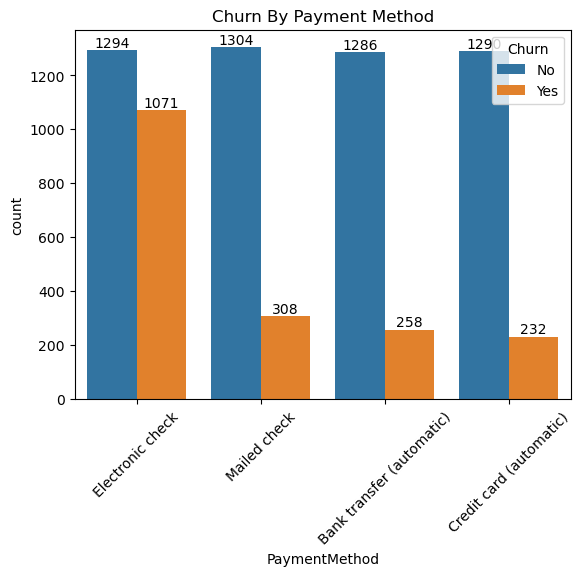

In [24]:
axes=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
plt.title("Churn By Payment Method")
axes.bar_label(axes.containers[0])
axes.bar_label(axes.containers[1])
plt.xticks(rotation=45)
plt.show()

Most of the customer with payment method Electroinc check had been churned.